In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy import absolute, mean
# import libraries
df = pd.read_csv("train.csv")
df["FGApred"]="0"
df["Error"]="0"
df["PercentageError"]="0"
df["RsquaredU"]="0"
df["RsquaredT"]="0"
df
# read CSV file into variable "data" and display data + add in extra columns

,FG,FGA,FGApred,Error,PercentageError,RsquaredU,RsquaredT
0,0.8,1.9,0,0,0,0,0
1,1.9,4.6,0,0,0,0,0
2,4.9,10.8,0,0,0,0,0
3,1.3,3.0,0,0,0,0,0
4,3.0,7.6,0,0,0,0,0
...,...,...,...,...,...,...,...
980,4.4,9.6,0,0,0,0,0
981,7.6,16.6,0,0,0,0,0
982,2.1,5.9,0,0,0,0,0
983,1.1,2.3,0,0,0,0,0


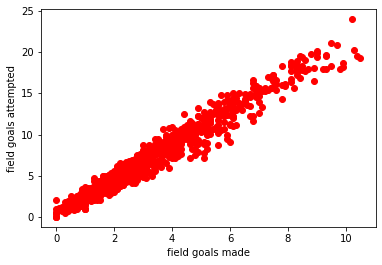

In [2]:
%matplotlib inline
plt.xlabel("field goals made")
plt.ylabel("field goals attempted")
plt.scatter(df.FG,df.FGA,color="red")

# plot scatter graph of field goals made per game against field goals attempted per game from data

In [3]:
x=np.array(df.FG)
y=np.array(df.FGA)
# assign FG and FGA to variables x and y

In [4]:
linreg=LinearRegression() 
x=x.reshape(-1,1) #reshape data in variable x

In [5]:
linreg.fit(x,y) #train the linear regression model with variables x and y 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
x=np.array(df.FG)
x=x.reshape(-1,1)
y=linreg.predict(x)
#predict y using regression model

In [7]:
df.FGApred=y
df.Error=absolute(df.FGA-df.FGApred)
df.PercentageError=absolute((df.Error/df.FGA)*100)
df.RsquaredU=absolute(df.Error*df.Error)
average1=df["FGA"].mean()
df.RsquaredT=absolute((df.FGA-average1)*(df.FGA-average1))
df=df[np.isfinite(df).all(1)]
df
#calculate table values and display table for training data

,FG,FGA,FGApred,Error,PercentageError,RsquaredU,RsquaredT
0,0.8,1.9,2.071914,0.171914,9.048088,0.029554,26.917662
1,1.9,4.6,4.348807,0.251193,5.460722,0.063098,6.191255
2,4.9,10.8,10.558515,0.241485,2.235970,0.058315,13.777286
3,1.3,3.0,3.106865,0.106865,3.562170,0.011420,16.713570
4,3.0,7.6,6.625700,0.974300,12.819738,0.949261,0.261915
...,...,...,...,...,...,...,...
980,4.4,9.6,9.523564,0.076436,0.796210,0.005842,6.309022
981,7.6,16.6,16.147253,0.452747,2.727392,0.204980,90.473895
982,2.1,5.9,4.762787,1.137213,19.274791,1.293253,1.411875
983,1.1,2.3,2.692885,0.392885,17.081936,0.154358,22.927083


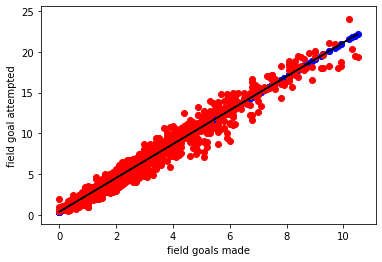

In [8]:
y_pred=linreg.predict(x)
plt.xlabel("field goals made")
plt.ylabel("field goal attempted")
plt.scatter(x,y,color="blue")
plt.scatter(df.FG,df.FGA,color="red")
plt.plot(x,y_pred,color="black")
plt.show() 
#plot graph of x,y/FG,FGA with linear regression model represented as straight line

In [9]:
linreg.coef_
#calculate coeficient

array([2.06990282])

In [10]:
linreg.intercept_
#calculate intercept

0.4159914215938416

In [11]:
df["Error"].mean() # mean absolute error

0.6973660021742648

In [12]:
df["PercentageError"].mean() # mean absolute percentage error

13.495609082760875

In [13]:
RsquaredUtotal1=df["RsquaredU"].sum()
RsquaredUtotal1

834.7673062474935

In [14]:
RsquaredTotal1=df["RsquaredT"].sum()
RsquaredTotal1

20712.734660073696

In [15]:
Rsquared1=1-(RsquaredUtotal1/RsquaredTotal1)
Rsquared1 #r squared value

0.9596978709017787

In [16]:
ESsum1=df["RsquaredU"].sum()
RMSE1=np.sqrt(ESsum1/982)
RMSE1 #root mean squared error

0.9219916159959903

In [17]:

test=pd.read_csv("test.csv")
test["FGApred"]="0" #FGA predicted values
test["Error"]="0" #absolute error
test["PercentageError"]="0" #absolute percentage error
test["RsquaredU"]="0" #R squared unexplained variance
test["RsquaredT"]="0" #R sqaured value total variance
test

#read in test data and add in needed columns

,FG,FGA,FGApred,Error,PercentageError,RsquaredU,RsquaredT
0,2.4,5.6,0,0,0,0,0
1,5.2,12.1,0,0,0,0,0
2,4.9,12.1,0,0,0,0,0
3,4.7,11.1,0,0,0,0,0
4,2.2,4.8,0,0,0,0,0
...,...,...,...,...,...,...,...
418,2.5,5.2,0,0,0,0,0
419,8.4,18.0,0,0,0,0,0
420,0.0,1.0,0,0,0,0,0
421,1.3,2.8,0,0,0,0,0


In [18]:

x1=np.array(test.FG) #assign FG from test data to x1
x1=x1.reshape(-1,1) #reshape x1
y1=linreg.predict(x1) #predict FGA of the test data and assign to y1

In [19]:
test.FGApred=y1 #assign predicted data to FGA of the test data
test.Error=absolute(test.FGA-test.FGApred)
test.PercentageError=absolute((test.Error/test.FGA)*100)
test.RsquaredU=absolute(test.Error*test.Error)
average=test["FGA"].mean()
test.RsquaredT=absolute((test.FGA-average)*(test.FGA-average))
#calculate absolute error, absolute percentage error, rsquared and root mean squared error
test=test[np.isfinite(test).all(1)]
#remove infinite values to avoid errors in calculations

In [20]:
test

,FG,FGA,FGApred,Error,PercentageError,RsquaredU,RsquaredT
0,2.4,5.6,5.383758,0.216242,3.861461,0.046761,3.136165
1,5.2,12.1,11.179486,0.920514,7.607553,0.847346,22.364179
2,4.9,12.1,10.558515,1.541485,12.739543,2.376175,22.364179
3,4.7,11.1,10.144535,0.955465,8.607796,0.912914,13.906023
4,2.2,4.8,4.969778,0.169778,3.537034,0.028824,6.609640
...,...,...,...,...,...,...,...
418,2.5,5.2,5.590748,0.390748,7.514394,0.152684,4.712902
419,8.4,18.0,17.803175,0.196825,1.093472,0.038740,112.977299
420,0.0,1.0,0.415991,0.584009,58.400858,0.341066,40.588647
421,1.3,2.8,3.106865,0.306865,10.959468,0.094166,20.893328


In [21]:
test["Error"].mean()
#mean absolute error

0.7623828675148068

In [22]:
test["PercentageError"].mean()
#mean absolute percentage error

13.039641343526357

In [23]:
RsquaredUtotal=test["RsquaredU"].sum()
RsquaredUtotal

432.0826969755806

In [24]:
RsquaredTtotal=test["RsquaredT"].sum()
RsquaredTtotal

8724.961849504552

In [25]:
Rsquared=1-(RsquaredUtotal/RsquaredTtotal)
Rsquared #calculate r squared value

0.9504774113138252

In [26]:
ESsum=test["RsquaredU"].sum()
RMSE=np.sqrt(ESsum/422)
RMSE #calculate root mean squared error

1.0118758060461597

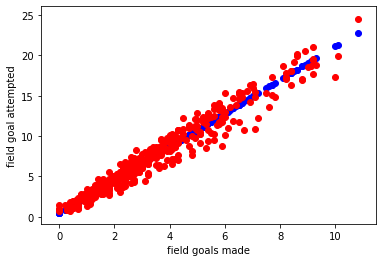

In [27]:

plt.xlabel("field goals made")
plt.ylabel("field goal attempted")
plt.scatter(x1,y1,color="blue") #predicted values
plt.scatter(test.FG,test.FGA,color="red") #actual values
plt.show() 
#plot graph of test data with predicted FGA value

In [28]:
test.to_csv("test results.csv")
df.to_csv("train results.csv")
#export data 

